# Logistic Regression

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

## create some data

,response,x_coord,y_coord
0,0.0,-0.201517,-0.683358
1,0.0,0.374519,-0.828082
2,0.0,-0.161895,-1.247107
3,0.0,0.037711,-0.047303
4,0.0,-0.260479,1.770204
5,0.0,0.392173,0.726251
6,0.0,-0.595546,-1.454800
7,0.0,-1.212473,-1.298846
8,0.0,-0.624020,-1.270223
9,0.0,0.535310,1.390765


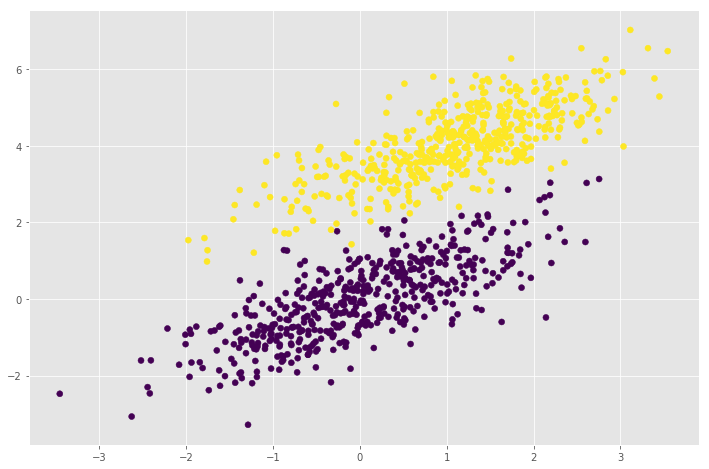

In [196]:
np.random.seed(12)
n = 500  # no of observations

# features
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], n)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], n)

# stacking columns and rows
X = np.vstack((x1, x2)).astype(np.float32)  # (50, 2) + (50, 2) = (100, 2)
y = np.hstack((np.zeros(n), np.ones(n)))  # (100,)

# plotting
plt.figure(figsize=(12,8))
# plt.scatter(X[:, 0], X[:, 1],
#             c = y)

df = pd.DataFrame({
    'x_coord': X[:, 0],
    'y_coord': X[:, 1],
    'response': y
})
plt.scatter(df['x_coord'], df['y_coord'], c=df['response'])
df.head(12)

## basic algorithm

Logistic regression is the estimate of logistic function (logit).  
A key difference from linear regression is that the output value being modeled is a binary value (0 or 1) rather than a numeric value.

### $p(x) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$ i.e. $\frac{p(x)}{1 - p(x)} =  e^{\beta_0 + \beta_1 X}$ or $log (\frac{p(x)}{1 - p(x)}) =  e^{\beta_0 + \beta_1 X}$
Note here $p(x) = p(y=1 | x)$ i.e. conditional probability of y (=1 or 0) given x.

Logistic regression is actually using sigmoid function: $\sigma(x) = \frac{1}{1 + e^{-\beta x}}$

In [2]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

We use the method of maximum likelihood (instead of least squares) to estimate coefficients in logistic regression model
### $l(\beta_0, \beta_1) = \prod_{i=1:y_i = 1}^n p(x_i) \prod_{i=1: y_i' = 0}^n (1 - p(x_i'))$
The estimates $\beta_0$ and $\beta_1$ are chosen to maximize this liklihood function.  

For easier calculations, we use [log-likelihood](http://mathworld.wolfram.com/Log-LikelihoodFunction.html), $F(\theta) = ln (l(\theta))$.
### $F(\theta) = \sum_{i=1}^n ln(f_i(y_i | \theta))$

For two class case, it can be written as:
### $F = \sum_{i=1}^n y_i log p(x_i) + (1 - y_i) log(1 - p(x_i))\\
= \sum_{i=1}^{N}y_{i}\beta ^{T}x_{i} - log(1+e^{\beta^{T}x_{i}})$

In [1]:
def log_liklihood(features, y, weights):
    scores = np.dot(features, weights)
    f = np.sum(y*scores - np.log(1 + np.exp(scores)))
    return f

### $\bigtriangledown f = X^{T}(Y - p)$
Here, p = predictions (conditional probability function)

In [6]:
def gradient(features, y, yhat):
    """
    features: X
    y: actual response variable
    yhat: prediction (estimated) response variable
    """
    error = y - yhat
    df = np.dot(features.T, error)
    return df

We'll use gradient descent algorithm for optimization.

In [26]:
def gradient_descent(features, y, yhat, alpha, weights):
    """repeatedly evaluating the gradient and then performing a parameter update"""    
    grad = gradient(features, y, yhat)
    weights += alpha * grad
    return weights

In [101]:
def logistic_regression(features, y, steps, alpha, add_intercept=False):
    """
    features: X
    y: acutal response
    steps: number of steps in gradient descent
    alphs: learning rate
    """
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    # initialize weights to zeroes
    weights = np.zeros(features.shape[1])
    
    for step in range(steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        # update weights
        weights = gradient_descent(features, y, predictions, alpha, weights)
        
        # print log-liklihood
        if step % 10000 == 0:
            print(log_liklihood(features, y, weights))
            
    return weights

In [202]:
weights = logistic_regression(X, y,
                     steps=300000, alpha=5e-5, add_intercept=True)
'Estimated regression coefficients: {}'.format(weights)

-641.6237863283129
-25.016708998423344
-19.69405474664935
-17.513922886140094
-16.2708089970452
-15.449453161805815
-14.859024366791818
-14.410715181462209
-14.05697770257662
-13.76979780876547
-13.53147744018288
-13.330224459661782
-13.157844864300078
-13.008448024017714
-12.87767856717493
-12.762239343583852
-12.659583597775875
-12.567709769183958
-12.485020827019731
-12.410225472164196
-12.342267249410007
-12.280272716788069
-12.223512906307583
-12.171374232368922
-12.123336231167091
-12.078954315831993
-12.037846266340797
-11.999681536118077
-11.964172707916703
-11.931068607444537


'Estimated regression coefficients: [-15.12574929  -5.07672109   8.4432816 ]'

In [205]:
final_scores = np.dot(np.hstack((np.ones((X.shape[0], 1)),
                                 X)), weights)
yhat = np.round(sigmoid(final_scores))  # predictions

print('Accuracy: {0}'.format((yhat == y).sum().astype(float) / len(preds)))

Accuracy: 0.995


**Check wrong predictions**

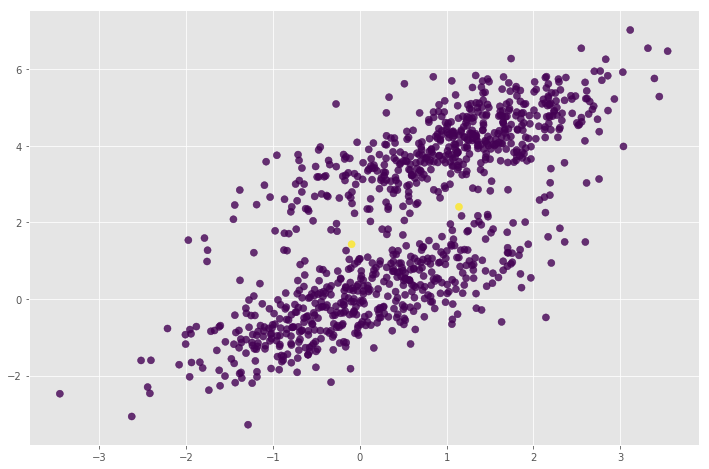

In [204]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1],
            c = yhat == y - 1, alpha = .8, s = 50)